This notebook will be used to calculate calibration curves. This notebook will introduce you to using python to graph lists of points, and then fit those points to functions. The focus here will be on creating calibration curves, first using standard solutions, then using the method of standard additions. Before we do anything in python, though, it's a good idea to first import the dependencies we will need. For this notebook we will use numpy to calculate nonlinear  fits, matplotlib to create our graphs, and the stats package from scipy to calculate how the linear fit.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Consider the following relationship between a series of standard solutions and the measured signal from an instrument:

| Silver ion concentration (ppb) | Signal (arb.) |
|:--------:|:--------:|
| 0.00 | 0.000 |
| 2.00 | 0.013 |
| 10.0 | 0.076 |
| 20.0 | 0.162 |
| 30.0 | 0.245 |
| 50.0 | 0.405 |
| 75.0 | 0.598 |
| 100.0 | 0.748 |
| 125.0 | 0.817 |
| 150.0 | 0.872 |

To create a calibration curve we first create two lists. The first, which will be our x-values, will be the silver ion concentration, and the second, which will be our y-values, will be the signal. We can then graph these points.

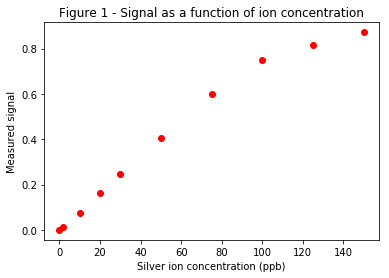

In [7]:
xrange = [0,2,10,20,30,50,75,100,125,150]
yrange = [0,0.013,0.076,0.162,0.245,0.405,0.598,0.748,0.817,0.872]
plt.plot(xrange,yrange,'ro')
plt.title("Figure 1 - Signal as a function of ion concentration")
plt.xlabel('Silver ion concentration (ppb)')
plt.ylabel('Measured signal')
plt.show()

Now I'm going to find a linear fit for the points using the linregress() function that I've imported from the stats part of the scipy library. In addition, because there's some curvature at the upper end of the calibration curve I'm going to use a variable, which I call listend, to define the last point that will be included in the linear fit.

The linear equation for the fit is y = 6.9437E-03 x + 2.2576E-02, with an R-squared value of 0.98481.


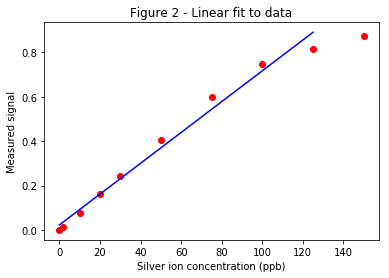

In [8]:
listend = len(xrange)-1
xsubrange = xrange[0:listend]
ysubrange = yrange[0:listend]
slope,intercept,r,tt,stderr=stats.linregress(xsubrange,ysubrange)
print("The linear equation for the fit is y = {0:1.4E} x + {1:1.4E}, with an R-squared value of {2:1.5f}.".format(slope, intercept, r**2))
linfit = [i*slope + intercept for i in xsubrange]
plt.plot(xrange,yrange,'ro')
plt.plot(xsubrange,linfit,'b-')
plt.title("Figure 2 - Linear fit to data")
plt.xlabel('Silver ion concentration (ppb)')
plt.ylabel('Measured signal')
plt.show()

Play around with the listend variable to see how changing which points we graph over changes the R$^{2}$ value of the linear fit. In addition, change the graph so that the points are blue circles and the line is a red, dashed line. You will need to make those changes with the two plt.plot() functions in the code cell above.

Now let's try to fit it to a higher order polynomial. Please remember that you should have a *reason* to fit data to a higher order polynomial, but you will sometimes need to do this. Below, I'm showing how we can fit the data points to a 2$^{\textrm{nd}}$ order polynomial, rather than just a line, using the polyfit function from the numpy library.

The curve fit for this function is y = -2.78E-05 x^2 + 1.02E-02 x + -1.74E-02.


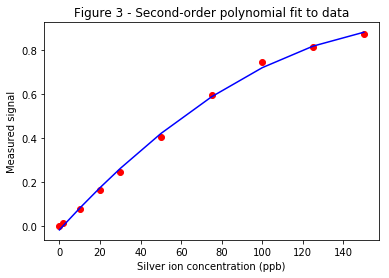

In [14]:
two_deg_fit = np.polyfit(xrange,yrange,2)
print("The curve fit for this function is y = {0:.2E} x^2 + {1:.2E} x + {2:.2E}.".format(two_deg_fit[0], two_deg_fit[1], two_deg_fit[2]))
curvefit = [two_deg_fit[0]*i**2 + two_deg_fit[1]*i + two_deg_fit[2] for i in xrange]
plt.plot(xrange,yrange,'ro')
plt.plot(xrange,curvefit,'b-')
plt.title("Figure 3 - Second-order polynomial fit to data")
plt.xlabel('Silver ion concentration (ppb)')
plt.ylabel('Measured signal')
plt.show()

In the code box below, fit the data points to a 3$^{\textrm{rd}}$ order polynomial, print out the function, and graph the data with the fitted curve. To do this, I would suggest copying the code from the 2$^{\textrm{nd}}$ order fit, above, renaming things to make sense, and making some minor modifications. For example, one of the entries in the np.polyfit() function dictates what order function to fit the data to. You'll also have to add one more piece to both the print() function and the curvefit definition to get the x$^{3}$ part. Finally, be sure to properly label the axis, and give the graph a title.

Now, let's try to put what you've learned into action to calculate [Ag$^{+}$] concentration in an unknown solution using the method of standard additions. Consider the following data for a series of standard additions:

| Solution | A | B | C | D | E |
|----------|---|---|---|---|---|
| mL unknown | 10.00 | 10.00 | 10.00 | 10.00 | 10.00 |
| mL standard | 0 | 5.00 | 10.00 | 15.00 | 20.00 |
| Silver ion concentration analyte added (ppb) | 0 | 6.0 | 12 | 18 | 24 |
| Absorbance | 0.11 | 0.29 | 0.48 | 0.72 | 0.91 |

Graph the measured absorbance as a function of concentration of analyte added, being sure to label your axes, and find a linear fit to the data.

From the fit you found above, what is the concentration of silver in the unknown solution? Based on this concentration, what is the mass of silver ions in the uknown?